In [152]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [153]:
# read data 
file_name = 'data/tracks.csv'
df = pd.read_csv(file_name)
key = ['A',"A#","B","C","C#","D","D#",'E','F','F#',"G","G#"]


##### _Getting information about data: we can see the column, datatypes as well as counts_

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470656 entries, 0 to 470655
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                470656 non-null  object 
 1   name              470591 non-null  object 
 2   popularity        470656 non-null  int64  
 3   duration_ms       470656 non-null  int64  
 4   explicit          470656 non-null  int64  
 5   artists           470656 non-null  object 
 6   id_artists        470656 non-null  object 
 7   release_date      470656 non-null  object 
 8   Year              470656 non-null  int64  
 9   Month             470656 non-null  int64  
 10  Day               470656 non-null  int64  
 11  danceability      470656 non-null  float64
 12  energy            470656 non-null  float64
 13  key               470656 non-null  int64  
 14  loudness          470656 non-null  float64
 15  mode              470656 non-null  int64  
 16  speechiness       47

##### _Looking at the varioous descriptive statistics: average, max, min_

In [155]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,470656.0,28.269925,18.677089,0.0,13.0000,28.000000,42.00000,100.000
duration_ms,470656.0,229888.750865,124847.866429,3344.0,175333.0000,215421.000000,264429.00000,5621218.000
explicit,470656.0,0.049909,0.217757,0.0,0.0000,0.000000,0.00000,1.000
Year,470656.0,1969.430939,44.829352,1905.0,1905.0000,1988.000000,2009.00000,2021.000
Month,470656.0,6.544791,3.078990,1.0,5.0000,6.000000,9.00000,12.000
Day,470656.0,14.936461,9.323004,1.0,7.0000,15.000000,23.00000,31.000
danceability,470656.0,0.566834,0.166713,0.0,0.4560,0.581000,0.69000,0.988
energy,470656.0,0.550763,0.252073,0.0,0.3550,0.561000,0.75800,1.000
key,470656.0,5.232061,3.522810,0.0,2.0000,5.000000,8.00000,11.000
loudness,470656.0,-10.009101,5.076422,-60.0,-12.6190,-8.982000,-6.32400,5.376


##### _Getting information about data: we can see there are some null values in name column_

In [156]:
df.isnull().sum()

id                   0
name                65
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
Year                 0
Month                0
Day                  0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [157]:
df.shape

(470656, 23)

##### _Printing first 5 rows to see how the data looks like_

In [158]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,Year,Month,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],2/22/1922,1922,2,...,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],6/1/1922,1922,6,...,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],3/21/1922,1922,3,...,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],3/21/1922,1922,3,...,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],4/5/1905,1905,4,...,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [159]:
# Converting milliseconds to seconds for each row in the column
df['duration'] = df['duration_ms'].apply(lambda x: round(x/1000))

In [160]:
# sorting yeah  newest to latest
df.head()
time_duration_table = df[['duration','Year']]
time_duration_table = time_duration_table.sort_values('Year',ascending=True)
time_duration_table.tail()

,duration,Year
164430,74,2021
164431,128,2021
164432,150,2021
164419,63,2021
398537,300,2021


##### _Trending duration over the years. It can be observed that from around 2012 duration of music has genreally been decreasing_

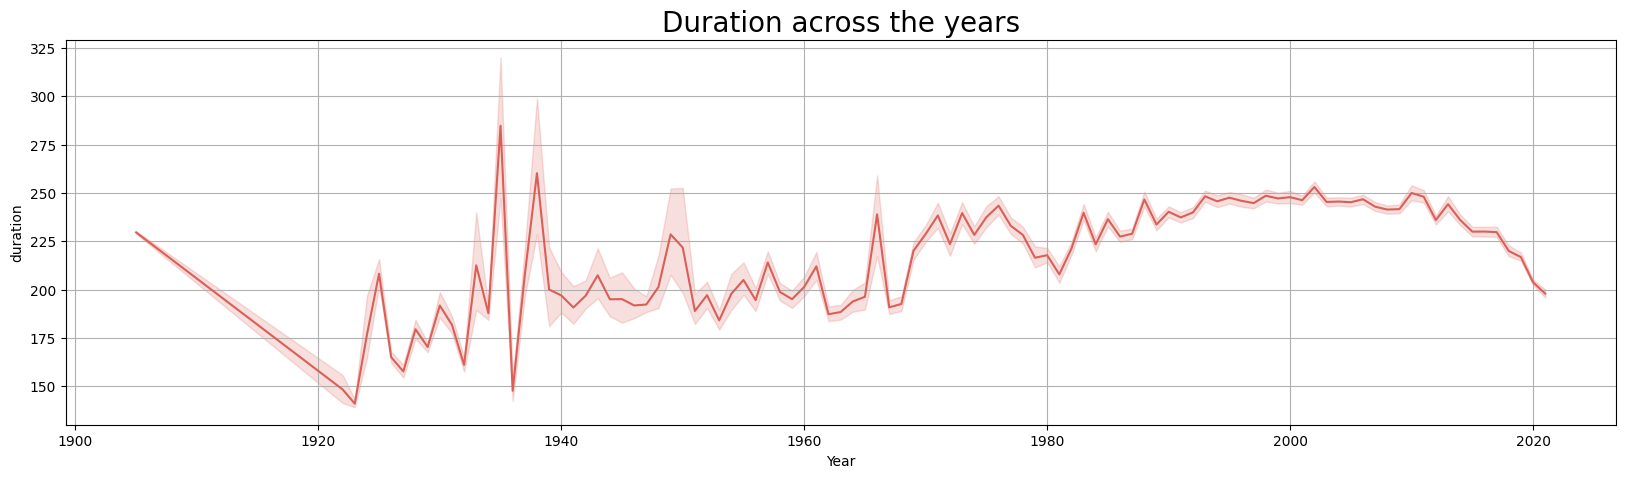

In [161]:
fig = plt.figure(figsize=(20,5))
sns.lineplot(data = time_duration_table,x = 'Year',y = 'duration')
plt.title("Duration across the years",fontsize=20)
plt.grid(True)
plt.show()

##### _Which month has the most song? From the graph below it can be seen that the month with most songs is the 6th Month which is **June**_

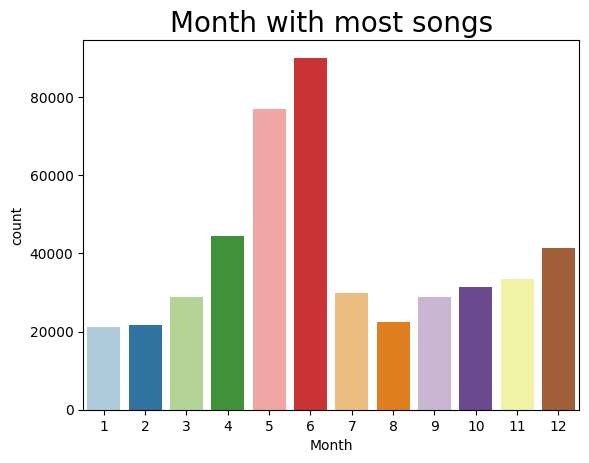

In [171]:
sns.countplot(df,x="Month",palette="Paired")
plt.title("Month with most songs",fontsize=20)
# plt.grid(True)
plt.show()

##### _Which day has the most songs? It can be seen that 1st day of every month seems to be the most popular._

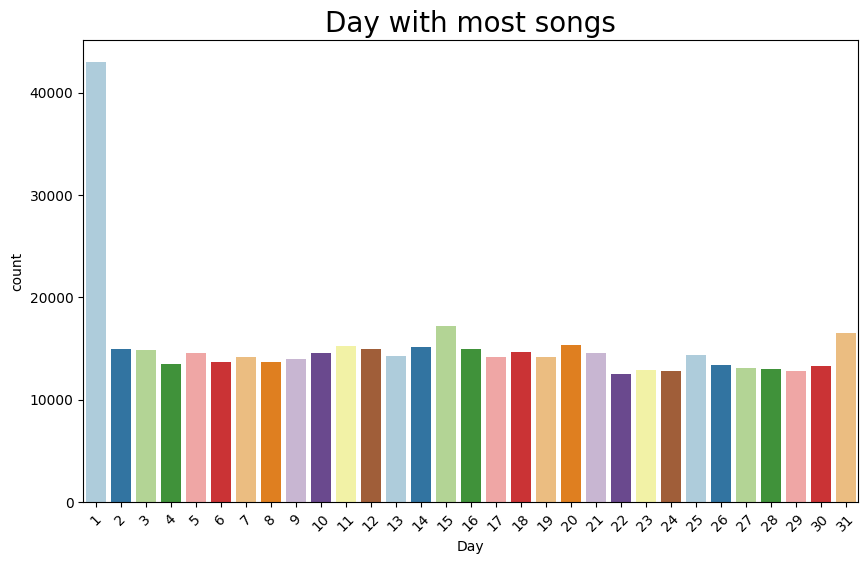

In [196]:
plt.figure(figsize=(10,6))
sns.countplot(df,x="Day",palette="Paired")
plt.title("Day with most songs",fontsize=20)
# plt.grid(True)
plt.xticks(rotation=45)
plt.show()

##### _From trend below we can see that although 1st day of the month is the time most songs are released, popularity is heavily affected probably due to the number of available options listners have. So it might be better to release the song on the 26th of each month_

Text(0.5, 1.0, 'Average Popularity per Day')

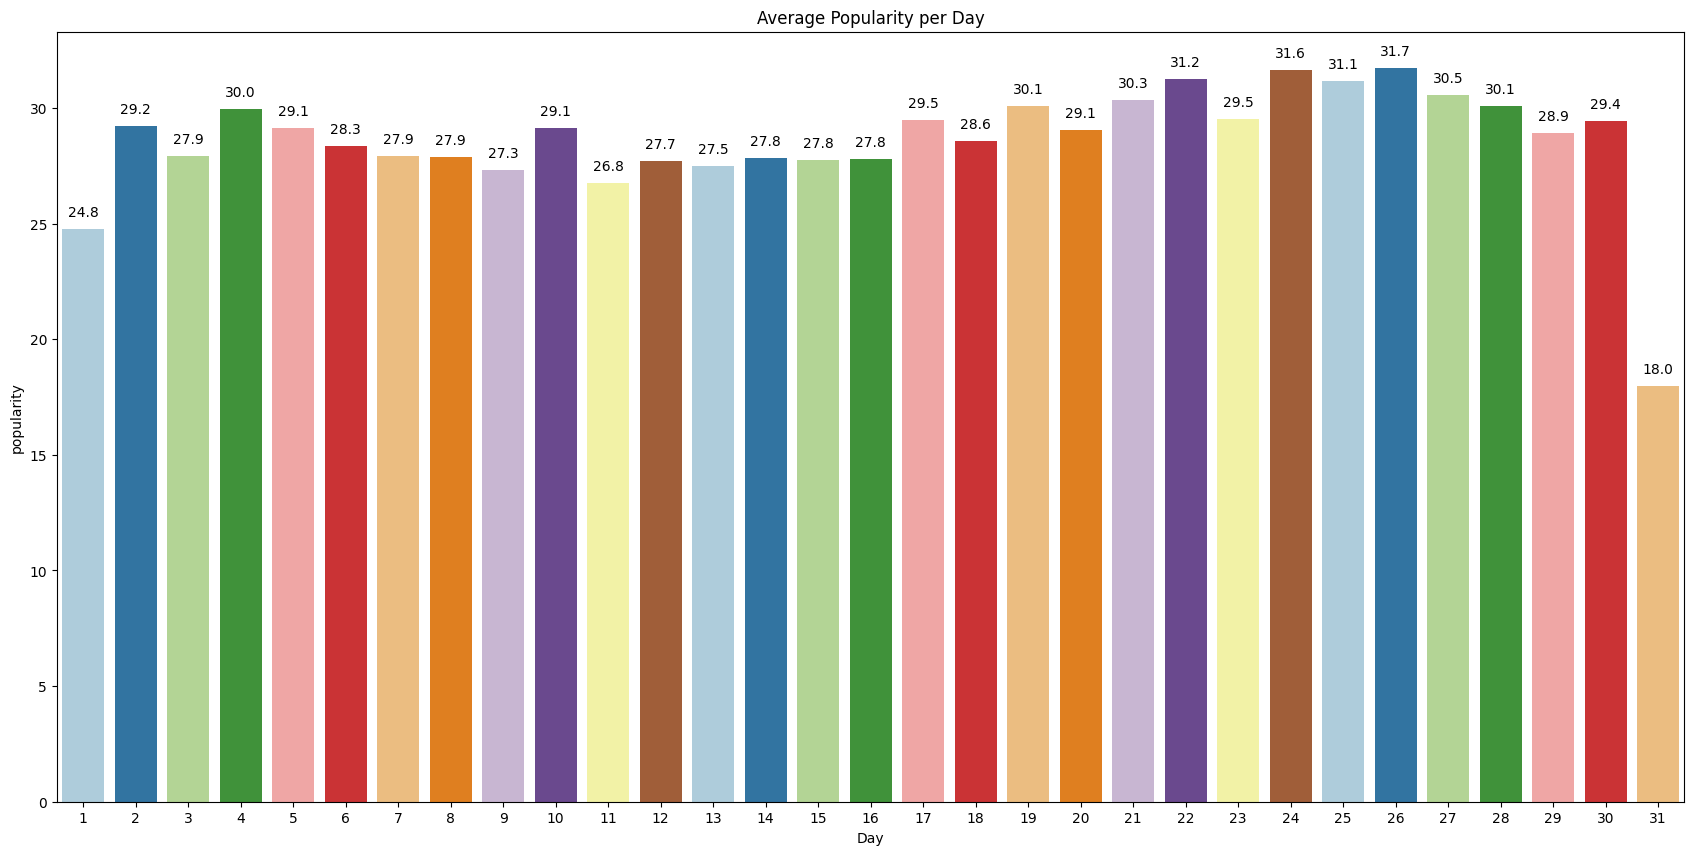

In [206]:
df_temp = df[['Day','popularity']]
df_avg = df_temp.groupby('Day',as_index=False).agg('mean')
plt.figure(figsize=(21,10))

a = sns.barplot(x='Day',y='popularity',data=df_avg,palette="Paired")
plt.bar_label(a.containers[0], fmt='%.1f',padding=7.0)
plt.title("Average Popularity per Day")

##### _Which keys are the most popular songs using ? From the data it can be seen that Key A# is the key most popular songs use, then followed by D#_

([<matplotlib.patches.Wedge at 0x20ae4c07010>,
 [Text(1.0012277631554896, 0.45556883814266214, 'A#'),
  Text(0.4314459345522128, 1.0118569096262415, 'D#'),
  Text(-0.23541815382105544, 1.074513049176922, 'A'),
  Text(-0.8019966756375411, 0.7528620937903122, 'G#'),
  Text(-1.0816313028453666, 0.20018422691369828, 'C#'),
  Text(-1.028844373202388, -0.38920336037833164, 'D'),
  Text(-0.6970218465090312, -0.8509762308602636, 'G'),
  Text(-0.2072493059986456, -1.0802998311409107, 'E'),
  Text(0.3188830993677098, -1.0527647262981619, 'F'),
  Text(0.7546074990538297, -0.8003546228839592, 'B'),
  Text(1.018318730897616, -0.41596509745779, 'F#'),
  Text(1.0953981994126145, -0.10051260977410911, 'C')],
 [Text(0.5461242344484488, 0.24849209353236112, '13.6%'),
  Text(0.23533414611938877, 0.5519219507052225, '10.0%'),
  Text(-0.12840990208421205, 0.5860980268237755, '9.7%'),
  Text(-0.43745273216593145, 0.41065205115835207, '9.4%'),
  Text(-0.5899807106429272, 0.10919139649838086, '8.7%'),
  Text(

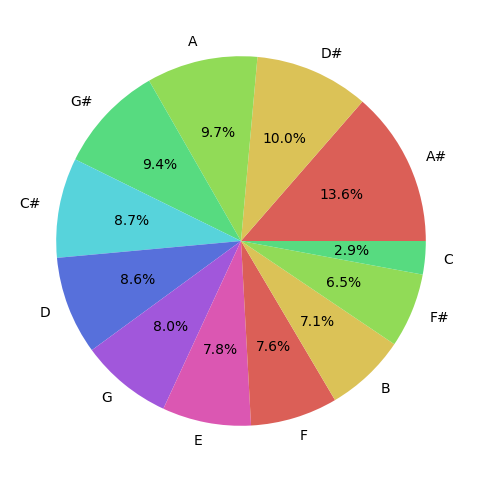

In [220]:
# picking songs with popularity >80
df['key_in_letter']=df['key'].apply(lambda x: key[x])
plt.figure(figsize=(17,6))
df_pop = df.sort_values('popularity',ascending=False).query("popularity>80")
df_pop.head(10)

# a = sns.displot(data = df_pop,x = "key_in_letter",palette="Paired",hue="key_in_letter",binwidth=12).set(title="Keys used in Popular song")
plt.pie(x=df_pop['key'].value_counts(),labels=df_pop['key_in_letter'].value_counts().keys(),autopct='%0.1f%%')


##### _It can be observed that song with highest popularity score is D#_

Text(0.5, 1.0, 'Average Popularity per Key')

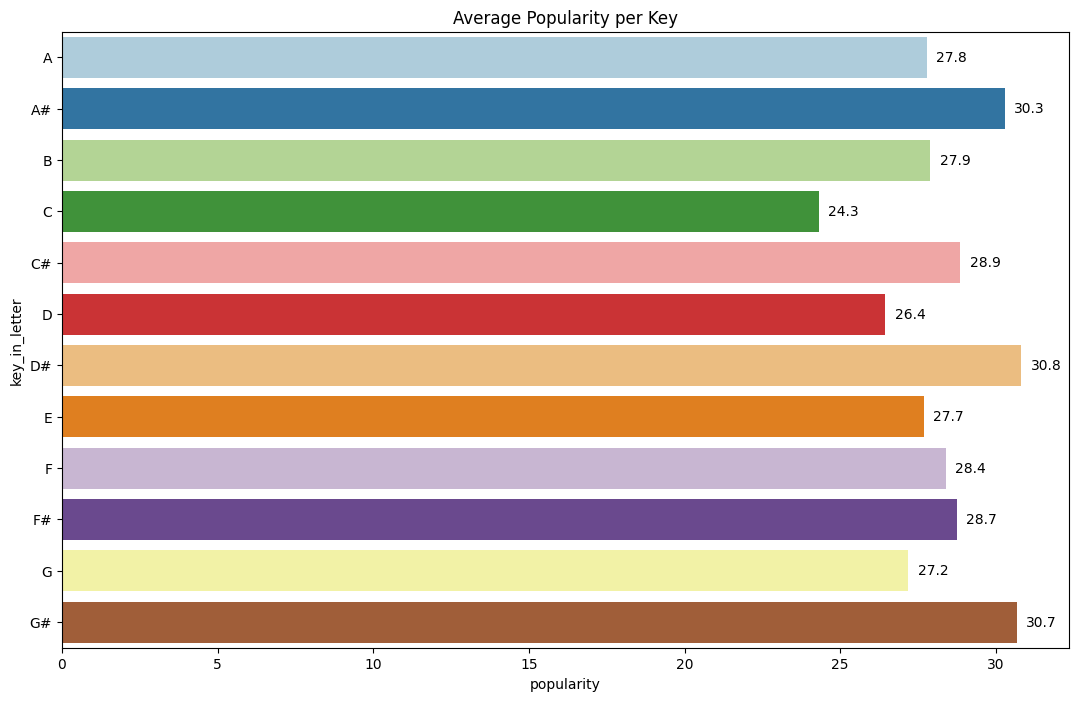

In [219]:
df_temp = df[['key_in_letter','popularity']]
df_avg = df_temp.groupby('key_in_letter',as_index=False).agg('mean')
plt.figure(figsize=(13,8))

a = sns.barplot(x='popularity',y='key_in_letter',data=df_avg,palette="Paired")
plt.bar_label(a.containers[0], fmt='%.1f',padding=7.0)
plt.title("Average Popularity per Key")

In [208]:
# Picking columns to see relationships bwtween them 
df.head()
corr_df = df[['duration','popularity','key','loudness','danceability','energy','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']].corr(method="pearson")

[Text(0.5, 0, 'duration'),
 Text(1.5, 0, 'popularity'),
 Text(2.5, 0, 'key'),
 Text(3.5, 0, 'loudness'),
 Text(4.5, 0, 'danceability'),
 Text(5.5, 0, 'energy'),
 Text(6.5, 0, 'speechiness'),
 Text(7.5, 0, 'acousticness'),
 Text(8.5, 0, 'instrumentalness'),
 Text(9.5, 0, 'liveness'),
 Text(10.5, 0, 'valence'),
 Text(11.5, 0, 'tempo'),
 Text(12.5, 0, 'time_signature')]

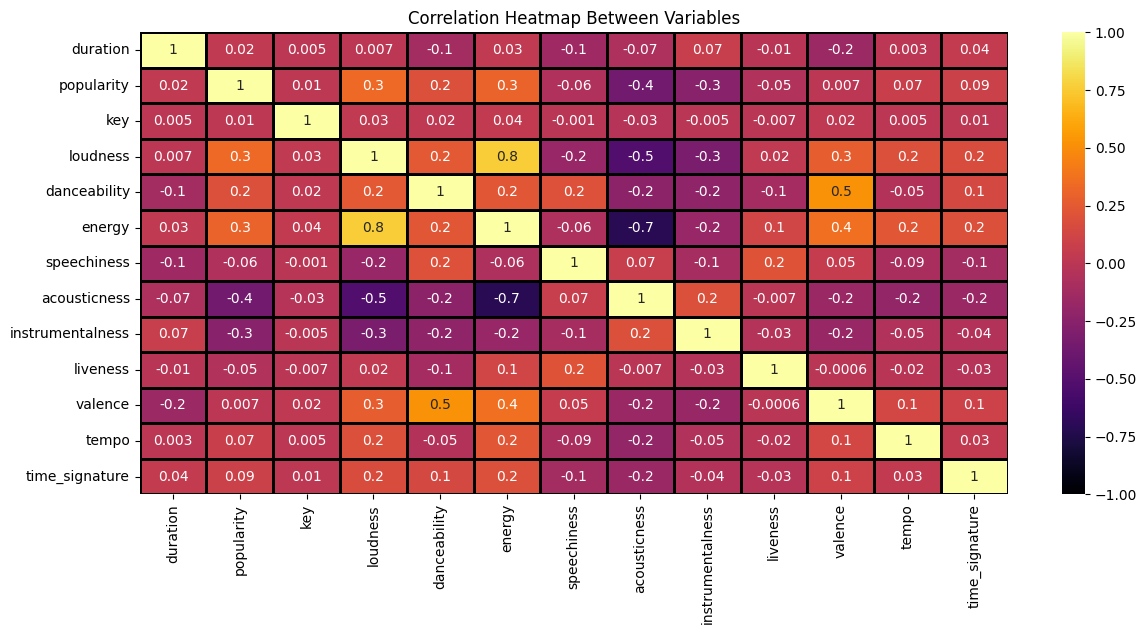

In [174]:
plt.figure(figsize=(14, 6))
heatmap = sns.heatmap(corr_df, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap="inferno", linewidths=1, linecolor="black")
heatmap.set_title("Correlation Heatmap Between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

##### _In the image above we can see there is a strong correlation between energy and loudness as well as enegry and popularity_

##### _Strong relationship between Valence and Danceability_

In [224]:
df_artist = pd.read_csv('data/features.csv')
df_artist.info()
df_artist.describe().transpose()
df_genres= df_artist['genre']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

[Text(0.5, 1.0, 'Valence vs Danceability')]

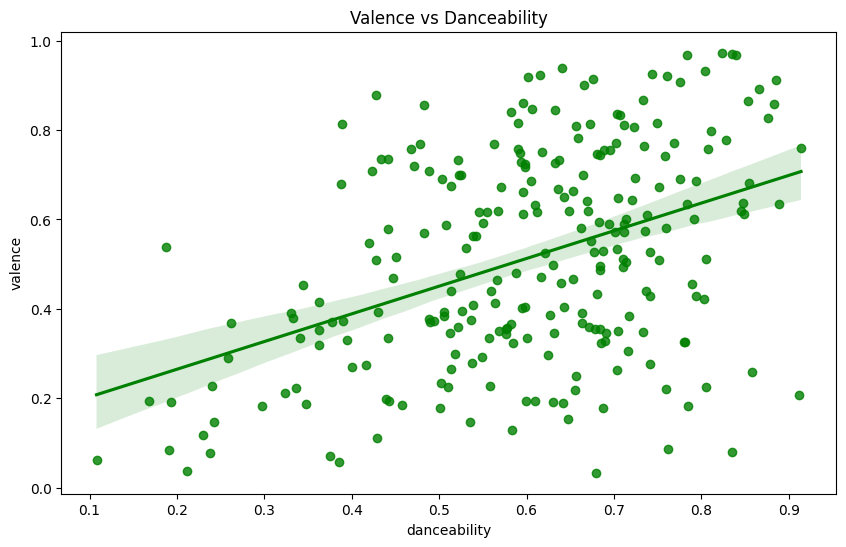

In [225]:
plt.figure(figsize=(10,6))
sns.regplot(data = df_artist.head(250), y= "valence", x = "danceability", color = "g").set(title="Valence vs Danceability")

##### _Very weak relationship between Acousticness  and Energy_

[Text(0.5, 1.0, 'Acousticness vs Energy')]

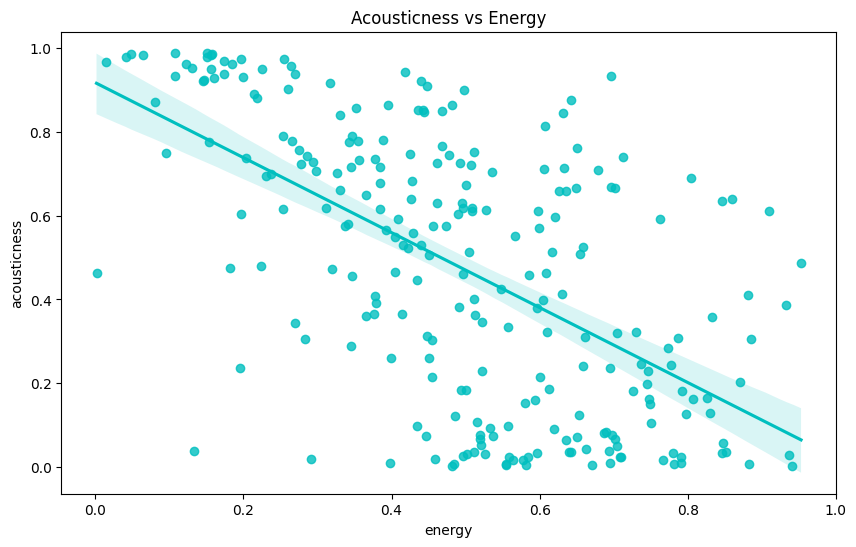

In [226]:
plt.figure(figsize=(10,6))
sns.regplot(data = df_artist.head(250), y= "acousticness", x = "energy", color = "c").set(title="Acousticness vs Energy")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

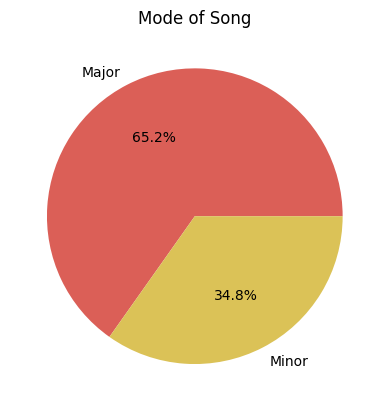

In [222]:
plt.pie(x=df_artist['mode'].value_counts(),labels=df_artist['mode'].value_counts().keys(),autopct='%0.1f%%')
plt.title("Mode of Song")
plt.show()

#####  _Image above shows Major mode of the song is highest_

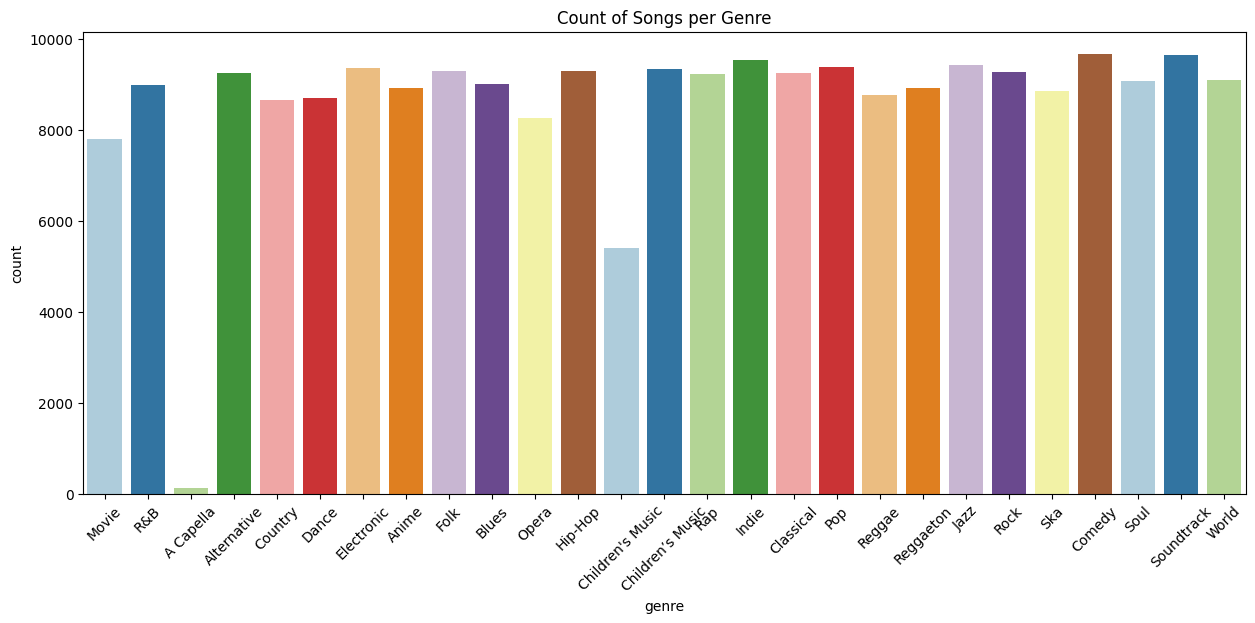

In [223]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df_artist,x='genre',palette="Paired")
plt.title("Count of Songs per Genre")
plt.xticks(rotation=45)
plt.show()

##### _Which genre is the most popular? We see the most popular genre is Comedy and least popular genre is the A Capella_